## Group neurons by cluster

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

In [92]:
DATA_PATH = r'../dataset/'
ANNOT_PATH = r'../clock_neurons_annotation.csv'

def mapper(string: str) -> str:
    if string[0].lower() == 'x':
        string = string[1:]
    ct_pattern = r'(CT|ZT)(\d\d)'
    if re.findall(ct_pattern, string):
        string = re.sub(ct_pattern, r'zt\2', string)
    return  string

test_str = "x20190528_CLK856_DD_CT02_AR05_ACAGAC"
mapper(test_str)

'20190528_CLK856_DD_zt02_AR05_ACAGAC'

In [94]:
genexp_df = None
for filename in os.listdir(DATA_PATH):
    new_df = pd.read_csv(os.path.join(DATA_PATH, filename), index_col=0).head(10)
    new_df = new_df.rename(mapper, axis='columns').T
    if genexp_df is None:
        genexp_df = new_df
        continue
    genexp_df = pd.concat([genexp_df, new_df])
genexp_df

,EGFP,ERCC-00002,ERCC-00004,ERCC-00022,ERCC-00044,ERCC-00046,ERCC-00060,ERCC-00074,ERCC-00096,ERCC-00130,ERCC-00003,ERCC-00009,ERCC-00014,ERCC-00019,ERCC-00025,ERCC-00028
20190528_CLK856_DD_zt02_AR05_ACAGAC,17,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
20190528_CLK856_DD_zt02_AR05_ACAGGA,0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
20190528_CLK856_DD_zt02_AR05_ACAGTG,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
20190528_CLK856_DD_zt02_AR05_ACCAAC,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
20190528_CLK856_DD_zt02_AR05_ACCAGA,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20190309_CLK856_LD_zt22_AR02_TGGTGA,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
20190309_CLK856_LD_zt22_AR02_TGGTTG,5,54,55,0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,0.0,0.0,0.0,0.0
20190309_CLK856_LD_zt22_AR02_TGTCAC,48,55,89,2,NaN,NaN,NaN,NaN,NaN,NaN,17.0,3.0,0.0,0.0,0.0,0.0
20190309_CLK856_LD_zt22_AR02_TGTCGA,5,59,63,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.0,1.0,1.0,0.0


In [95]:
annot_df = pd.read_csv(ANNOT_PATH, index_col=0)
annot_df['Idents']

20181215_CLK856_LD_zt14_AR07_ACAGGA         29:LPN
20181215_CLK856_LD_zt14_AR07_CTTCTG         29:LPN
20181231_CLK856_LD_zt14_AR02_GTACCA         29:LPN
20181231_CLK856_LD_zt14_AR02_TCCTTC         29:LPN
20181231_CLK856_LD_zt14_AR08_AGACAG         29:LPN
                                          ...     
20190710_CLK856_DD_zt06_AR04_GTCTTC    1:DN1p_CNMa
20190710_CLK856_DD_zt06_AR04_TCCTTC    1:DN1p_CNMa
20190719_CLK856_DD_zt06_AR18_GTCTTC    1:DN1p_CNMa
20190814_CLK856_DD_zt06_AR19_TCTGCA    1:DN1p_CNMa
20190814_CLK856_DD_zt06_AR20_CACTTC    1:DN1p_CNMa
Name: Idents, Length: 2615, dtype: object

In [96]:
genexp_df = genexp_df.merge(annot_df[['Idents']], left_index=True, right_index=True, how='left')
genexp_df['Idents']

20190528_CLK856_DD_zt02_AR05_ACAGAC         6:DN1p
20190528_CLK856_DD_zt02_AR05_ACAGGA            NaN
20190528_CLK856_DD_zt02_AR05_ACAGTG            NaN
20190528_CLK856_DD_zt02_AR05_ACCAAC            NaN
20190528_CLK856_DD_zt02_AR05_ACCAGA            NaN
                                          ...     
20190309_CLK856_LD_zt22_AR02_TGGTGA            NaN
20190309_CLK856_LD_zt22_AR02_TGGTTG            NaN
20190309_CLK856_LD_zt22_AR02_TGTCAC    1:DN1p_CNMa
20190309_CLK856_LD_zt22_AR02_TGTCGA            NaN
20190309_CLK856_LD_zt22_AR02_TGTCTG            NaN
Name: Idents, Length: 8060, dtype: object

In [99]:
clusters_df = genexp_df.groupby(['Idents']).sum()
clusters_df

,EGFP,ERCC-00002,ERCC-00004,ERCC-00022,ERCC-00044,ERCC-00046,ERCC-00060,ERCC-00074,ERCC-00096,ERCC-00130,ERCC-00003,ERCC-00009,ERCC-00014,ERCC-00019,ERCC-00025,ERCC-00028
Idents,,,,,,,,,,,,,,,,
12:LNd,8076,7275,4230,62,19.0,1904.0,115.0,3441.0,2111.0,4826.0,479.0,228.0,1.0,1.0,11.0,0.0
14:DN3,12002,8664,5414,95,24.0,2641.0,237.0,4368.0,3062.0,7555.0,656.0,272.0,1.0,1.0,11.0,0.0
15:DN1p_CNMa,7975,6830,3890,52,9.0,2422.0,193.0,3857.0,2479.0,5861.0,392.0,172.0,3.0,1.0,2.0,0.0
18:DN1p,2646,5347,3249,59,7.0,1462.0,92.0,3083.0,1770.0,3999.0,426.0,180.0,2.0,9.0,5.0,2.0
19:DN2,3662,5728,3193,63,13.0,1991.0,130.0,3599.0,2240.0,5552.0,294.0,130.0,1.0,2.0,4.0,2.0
1:DN1p_CNMa,23675,25837,15508,200,56.0,8940.0,680.0,12715.0,8891.0,22804.0,1606.0,817.0,0.0,20.0,34.0,1.0
20:DN3,3137,7649,4433,68,21.0,2757.0,244.0,3896.0,2657.0,7108.0,400.0,210.0,1.0,5.0,7.0,0.0
25:l_LNv,5003,3996,2565,30,9.0,1531.0,118.0,2218.0,1272.0,3449.0,256.0,124.0,0.0,1.0,10.0,0.0
29:LPN,614,2937,1721,29,6.0,808.0,74.0,1615.0,1120.0,2713.0,227.0,97.0,1.0,3.0,8.0,0.0


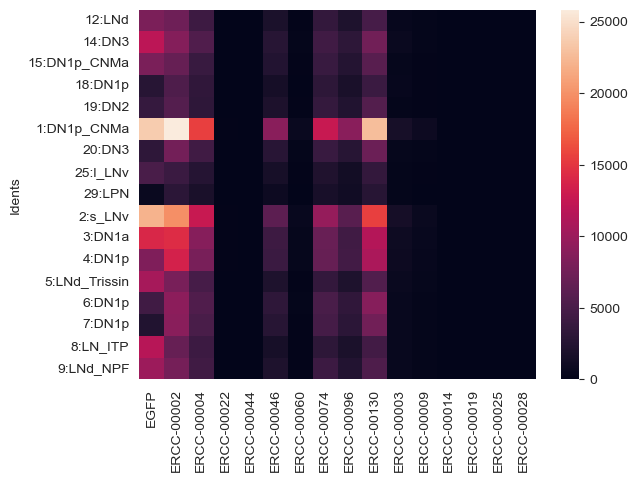

In [100]:
ax = sns.heatmap(clusters_df)
plt.show()